### Machine Hack Predicting Flight Price
**Link:** https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/overview

### Import Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

#### Import Data

In [4]:
train_df = pd.read_excel('Data_Train.xlsx')

test_df = pd.read_excel('Test_set.xlsx')

sample_df = pd.read_excel('Sample_submission.xlsx')

In [5]:
df = pd.concat([train_df, test_df])

In [6]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [7]:
df['Airline'].value_counts()
#Jet Airways has more flights

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

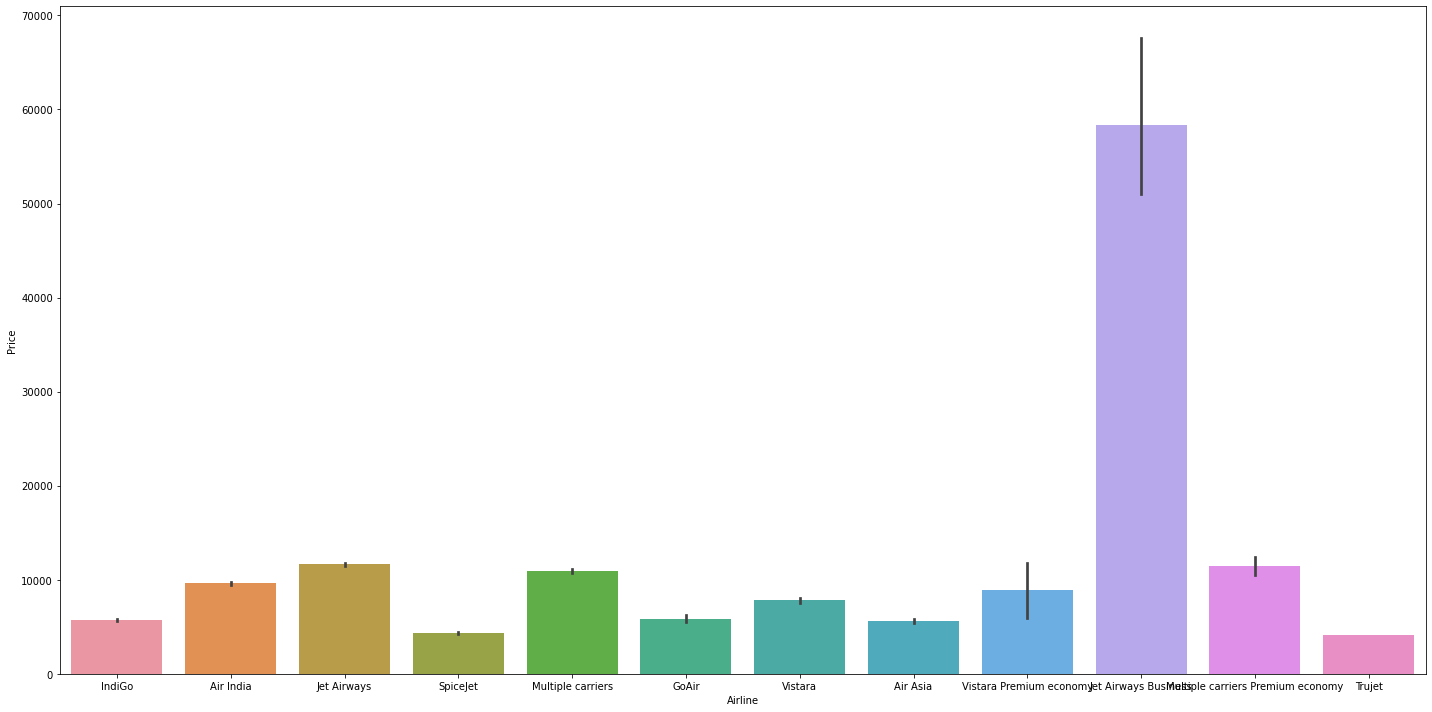

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Airline'], y=df['Price'])
plt.tight_layout()

In [9]:
df.groupby('Airline')['Price'].mean()

#Looks like jet airways has the highest price amount

Airline
Air Asia                              5590.260188
Air India                             9611.210616
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [10]:
df['Date_of_Journey'].apply(lambda x : x.split('/')[0]).astype(int)

0       24
1        1
2        9
3       12
4        1
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: int64

In [11]:
#Spliting Date, month and year from Date of journey
df['Date'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[0]).astype(int)
df['Month'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[1]).astype(int)
df['Year'] = df['Date_of_Journey'].apply(lambda x : x.split('/')[2]).astype(int)

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [14]:
df.groupby('Source')['Price'].mean()
#Mean ticket price of Delhi is high.

Source
Banglore     8017.464269
Chennai      4789.892388
Delhi       10539.439057
Kolkata      9158.389411
Mumbai       5059.708752
Name: Price, dtype: float64

In [15]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [16]:
df.groupby('Destination')['Price'].mean()
#Flights to Cochin is costliest

Destination
Banglore      9158.389411
Cochin       10539.439057
Delhi         5143.918577
Hyderabad     5059.708752
Kolkata       4789.892388
New Delhi    11917.716738
Name: Price, dtype: float64

In [17]:
df['Duration'].apply(lambda x : int(x.split()[0][:-1]))

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration, Length: 13354, dtype: int64

In [18]:
#Converting duration hours into total mins. travelled
df['Duration_mins'] = df['Duration'].apply(lambda x : int(x.split()[0][:-1])*60+(int(x.split()[-1][:-1])))

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,1159
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,285


In [20]:
symbol = df['Route'][6000].split()[1]

In [21]:
(df['Route'][6000].split(symbol))

['CCU ', ' BLR']

In [22]:
#Removing rows with null values in row column
df.drop(9039, inplace= True)

In [23]:
 df['Route'].str.split(symbol).str[0]

0       BLR 
1       CCU 
2       DEL 
3       CCU 
4       BLR 
        ... 
2666    CCU 
2667    CCU 
2668    DEL 
2669    DEL 
2670    DEL 
Name: Route, Length: 13353, dtype: object

In [24]:
df['Route_1'] = df['Route'].str.split(symbol).str[0]
df['Route_2'] = df['Route'].str.split(symbol).str[1]
df['Route_3'] = df['Route'].str.split(symbol).str[2]
df['Route_4'] = df['Route'].str.split(symbol).str[3]
df['Route_5'] = df['Route'].str.split(symbol).str[4]


In [25]:
#Replacing space in city
def replace(col):
    df[col] = df[col].str.replace(' ','')

In [26]:
for i in df.columns[15:-1]:
    replace(i)

In [27]:
df['Route_2'].unique()

array(['DEL', 'IXR', 'LKO', 'NAG', 'BLR', 'BOM', 'CCU', 'AMD', 'PNQ',
       'COK', 'IDR', 'GAU', 'MAA', 'HYD', 'BHO', 'JAI', 'ATQ', 'JDH',
       'BBI', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED',
       'VGA', 'VNS', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ', 'NDC',
       'IXZ', 'HBX', 'IXA', 'STV'], dtype=object)

In [28]:
df.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Duration_mins          0
Route_1                0
Route_2                0
Route_3             4340
Route_4            11396
Route_5            13295
dtype: int64

In [29]:
df['Route_3'].fillna('None', inplace = True)

In [30]:
df['Route_4'].fillna('None', inplace = True)
df['Route_5'].fillna('None', inplace = True)

In [31]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Duration_mins         0
Route_1               0
Route_2               0
Route_3               0
Route_4               0
Route_5               0
dtype: int64

In [32]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,170,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,445,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,1159,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,325,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,285,BLR,NAG,DEL,None,None


In [33]:
df['Num of Stops'] = df['Total_Stops'].replace('non-stop', '0 stop').apply(lambda x : x[0]).astype(int)

In [34]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Date,Month,Year,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,170,BLR,DEL,None,None,None,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,445,CCU,IXR,BBI,BLR,None,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,1159,DEL,LKO,BOM,COK,None,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,2019,325,CCU,NAG,BLR,None,None,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,2019,285,BLR,NAG,DEL,None,None,1


In [35]:
df['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [36]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info','No info')

In [37]:
df['Additional_Info'].value_counts()

No info                         10495
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Date,Month,Year,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,170,BLR,DEL,None,None,None,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,445,CCU,IXR,BBI,BLR,None,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,1159,DEL,LKO,BOM,COK,None,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,2019,325,CCU,NAG,BLR,None,None,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,2019,285,BLR,NAG,DEL,None,None,1


In [39]:
dummy = pd.get_dummies(df[['Airline', 'Source', 'Destination']])

In [40]:
cities=[]
cities.extend(list(df['Route_1'].unique()))
cities.extend(list(df['Route_2'].unique()))
cities.extend(list(df['Route_3'].unique()))
cities.extend(list(df['Route_4'].unique()))
cities.extend(list(df['Route_5'].unique()))

In [41]:
len(cities),len(set(cities))

(91, 49)

In [42]:
unique_cities = pd.DataFrame(data = set(cities))

In [43]:
unique_cities.head()

,0
0,JDH
1,IXA
2,JAI
3,NDC
4,None


#### Label Encoder

In [44]:
le = LabelEncoder()

In [45]:
le.fit(pd.DataFrame(unique_cities))

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

In [46]:
df_encode = df.copy()

In [47]:
def encoding(col):
    df_encode[col]=le.transform(df_encode[col])

In [48]:
for i in df.columns[15:-1]:
    encoding(i)

In [49]:
df_encode.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Date,Month,Year,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,170,10,15,38,38,38,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,445,12,27,7,10,38,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,1159,15,34,11,13,38,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,2019,325,12,36,10,38,38,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,2019,285,10,36,15,38,38,1


In [50]:
dummy.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
Airport = []
Airport.extend(df_encode['Destination'].unique())
Airport.extend(df_encode['Source'].unique())

In [52]:
airport_df = pd.DataFrame(set(Airport))

In [53]:
le.fit(airport_df)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

In [54]:
#tried this not working
#df_encode['Destination'] = le.transform(df_encode['Destination'])

#df_encode['Source'] = le.transform(df_encode['Source'])

In [55]:
df_encode.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Date,Month,Year,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,170,10,15,38,38,38,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,445,12,27,7,10,38,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,1159,15,34,11,13,38,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,12,5,2019,325,12,36,10,38,38,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,1,3,2019,285,10,36,15,38,38,1


In [56]:
final_df = df_encode.drop(['Year','Airline','Source', 'Destination','Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info'], axis =1)

In [57]:
dummy[dummy.columns[:12]]

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0,1,0,0,0,0,0,0,0,0,0,0
2667,0,0,0,1,0,0,0,0,0,0,0,0
2668,0,0,0,0,1,0,0,0,0,0,0,0
2669,0,1,0,0,0,0,0,0,0,0,0,0


In [266]:
#Tried this but not good
##dummy2 = pd.get_dummies(df[['Route_1','Route_2', 'Route_3', 'Route_4', 'Route_5']])

In [324]:
##final_df.drop(['Route_1','Route_2', 'Route_3', 'Route_4', 'Route_5'], axis=1)

In [330]:
dummy.iloc[:,12:]

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2666,0,0,0,1,0,1,0,0,0,0,0
2667,0,0,0,1,0,1,0,0,0,0,0
2668,0,0,1,0,0,0,1,0,0,0,0
2669,0,0,1,0,0,0,1,0,0,0,0


In [58]:
final_concat_df = pd.concat([final_df, dummy], axis =1)

In [59]:
final_concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Price                                      10682 non-null  float64
 1   Date                                       13353 non-null  int64  
 2   Month                                      13353 non-null  int64  
 3   Duration_mins                              13353 non-null  int64  
 4   Route_1                                    13353 non-null  int64  
 5   Route_2                                    13353 non-null  int64  
 6   Route_3                                    13353 non-null  int64  
 7   Route_4                                    13353 non-null  int64  
 8   Route_5                                    13353 non-null  int64  
 9   Num of Stops                               13353 non-null  int64  
 10  Airline_Air Asia       

In [60]:
final_df[10682:]

,Price,Date,Month,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops
0,NaN,6,6,655,15,11,13,38,38,1
1,NaN,12,5,244,12,35,10,38,38,1
2,NaN,21,5,1425,15,11,13,38,38,1
3,NaN,21,5,793,15,11,13,38,38,1
4,NaN,24,6,170,10,15,38,38,38,0
...,...,...,...,...,...,...,...,...,...,...
2666,NaN,6,6,1435,12,15,10,38,38,1
2667,NaN,27,3,155,12,10,38,38,38,0
2668,NaN,6,3,395,15,11,13,38,38,1
2669,NaN,6,3,915,15,11,13,38,38,1


In [61]:
train_split = final_concat_df[:10682]

test_split = final_concat_df[10682:]

#### Spliting

In [76]:
X = train_split.drop('Price',axis=1)

y = train_split['Price']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) 

#### Modelling

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train, y_train)

LinearRegression()

In [65]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [66]:
def metrics_func(y_true, y_pred):
    """Gives metrics of actual and predicted values"""
    print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
    print('MSE:', metrics.mean_squared_error(y_true, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print('R2 Score:', metrics.r2_score(y_true,y_pred))

In [67]:
metrics_func(y_train, train_pred)

MAE: 1970.792414070776
MSE: 8046115.582812347
RMSE: 2836.567570641029
R2 Score: 0.630985715688344


In [69]:
metrics_func(y_test, test_pred)

MAE: 1893.1387880767384
MSE: 7362831.326889921
RMSE: 2713.453763543783
R2 Score: 0.6315610342306366


In [70]:
test_split.isna().sum()

Price                                        2671
Date                                            0
Month                                           0
Duration_mins                                   0
Route_1                                         0
Route_2                                         0
Route_3                                         0
Route_4                                         0
Route_5                                         0
Num of Stops                                    0
Airline_Air Asia                                0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0


In [281]:
final_test_pred = lr.predict(test_split.drop('Price', axis =1))

In [282]:
sample_df['Price'] = final_test_pred

sample_df.to_csv('Linear_pred_3.csv', index=False)

#### KNN

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [201]:
knn = KNeighborsRegressor(n_neighbors=5,n_jobs=-1)

In [207]:
from sklearn.preprocessing import StandardScaler

In [283]:
sc = StandardScaler()

In [365]:
X = train_split.drop('Price',axis=1)

In [366]:
sc.fit(X)

StandardScaler()

In [367]:
train_scaled = pd.DataFrame(sc.transform(X), columns=X.columns)

In [368]:
test_scaled = sc.transform(test_split.drop('Price',axis=1))

In [369]:
train_scaled

,Date,Month,Duration_mins,Route_1,Route_2,Route_3,Route_4,Route_5,Num of Stops,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.237288,-1.467402,-0.932145,-0.790177,0.018264,1.381135,0.412256,0.065746,-1.220666,-0.17545,...,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,-1.475307,0.250289,-0.391515,-0.353334,1.714772,-1.130380,-2.703843,0.065746,1.741432,-0.17545,...,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,-0.531796,1.109135,1.012157,0.301929,2.704401,-0.806313,-2.369975,0.065746,1.741432,-0.17545,...,-0.192319,1.164018,-0.606266,-0.264206,-0.606266,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,-0.177979,0.250289,-0.627427,-0.353334,2.987152,-0.887330,0.412256,0.065746,0.260383,-0.17545,...,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,-1.475307,-1.467402,-0.706064,-0.790177,2.987152,-0.482247,0.412256,0.065746,0.260383,-0.17545,...,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-0.531796,-0.608557,-0.971464,-0.353334,-0.688614,1.381135,0.412256,0.065746,-1.220666,5.69964,...,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10678,1.591104,-0.608557,-0.961634,-0.353334,-0.688614,1.381135,0.412256,0.065746,-1.220666,-0.17545,...,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10679,1.591104,-0.608557,-0.906588,-0.790177,0.018264,1.381135,0.412256,0.065746,-1.220666,-0.17545,...,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,2.728419,-0.264206,-0.192319,-0.309176
10680,-1.475307,-1.467402,-0.951805,-0.790177,0.018264,1.381135,0.412256,0.065746,-1.220666,-0.17545,...,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


In [370]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_scaled, train_split['Price'], test_size=0.3,random_state=123)

In [371]:
X_test1.columns

Index(['Date', 'Month', 'Duration_mins', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5', 'Num of Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [372]:
knn.fit(X_train1, y_train1)

KNeighborsRegressor(n_jobs=-1)

In [373]:
train_pred_knn = knn.predict(X_train1)

In [374]:
test_pred_knn = knn.predict(X_test1)

In [375]:
metrics_func(y_train, train_pred_knn)

MAE: 1099.3357228835093
MSE: 3139869.926194998
RMSE: 1771.9678118394245
R2 Score: 0.8559979853978738


In [376]:
metrics_func(y_test, test_pred_knn)

MAE: 1342.5678627145087
MSE: 4296010.9923744155
RMSE: 2072.6820770138424
R2 Score: 0.7850259259391683


In [297]:
final_test_pred_knn = knn.predict(test_scaled)

In [298]:
sample_df['Price'] = final_test_pred_knn

sample_df.to_csv('Knn_pred_4.csv', index=False)

#### Normality

<AxesSubplot:xlabel='Price', ylabel='Density'>

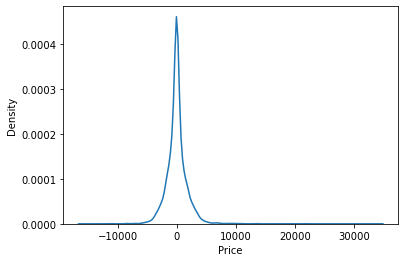

In [380]:
sns.kdeplot(y_train-train_pred_knn)

<AxesSubplot:xlabel='Price'>

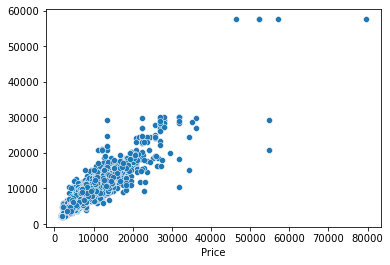

In [379]:
sns.scatterplot(x = y_train, y = train_pred_knn)

#### Decision Tree

In [71]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

train_pred = dtree.predict(X_train)

test_pred = dtree.predict(X_test)

In [72]:
metrics_func(y_train, train_pred)

MAE: 422.3775529613566
MSE: 1115608.253170145
RMSE: 1056.2235810519214
R2 Score: 0.9488355123812594


In [73]:
metrics_func(y_test, test_pred)

MAE: 1351.4395890597527
MSE: 5408281.754555435
RMSE: 2325.571274881816
R2 Score: 0.7293674609982664


In [79]:
dtree.fit(X, y)

final_test_pred = dtree.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('dtree.csv', index=False)


### Bagging

In [86]:
bag = BaggingRegressor()

bag.fit(X_train, y_train)


train_pred = dtree.predict(X_train)

test_pred = dtree.predict(X_test)

In [87]:
metrics_func(y_train, train_pred)

MAE: 533.3885367380261
MSE: 1377627.238635361
RMSE: 1173.723663659961
R2 Score: 0.9368186891822423


In [88]:
metrics_func(y_test, test_pred)

MAE: 500.14153294372164
MSE: 1051114.700274265
RMSE: 1025.238850353548
R2 Score: 0.947401808369606


In [89]:
bag.fit(X, y)

final_test_pred = bag.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('bag.csv', index=False)



#### Random Forest

In [80]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)

test_pred = rf.predict(X_test)

In [81]:
metrics_func(y_train, train_pred)

MAE: 657.3461190207255
MSE: 1458653.4988784653
RMSE: 1207.7472827038218
R2 Score: 0.9331026292864673


In [82]:
metrics_func(y_test, test_pred)

MAE: 1210.2098383426007
MSE: 3735582.4179573446
RMSE: 1932.7654844696872
R2 Score: 0.8130699914865782


In [84]:
rf.fit(X, y)

final_test_pred = rf.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('rf.csv', index=False)

#### ADA Boost

In [90]:
ada = AdaBoostRegressor()

ada.fit(X_train, y_train)

train_pred = ada.predict(X_train)

test_pred = ada.predict(X_test)

In [91]:
metrics_func(y_train, train_pred)

MAE: 2731.086304304747
MSE: 11990102.449445147
RMSE: 3462.67273207347
R2 Score: 0.4501049570233817


In [92]:
metrics_func(y_test, test_pred)

MAE: 2678.050530773939
MSE: 11420360.975780973
RMSE: 3379.402458391272
R2 Score: 0.4285206600805176


In [93]:
ada.fit(X, y)

final_test_pred = ada.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('ada.csv', index=False)

#### GRAD Boost

In [94]:
grad = GradientBoostingRegressor()

grad.fit(X_train, y_train)

train_pred = grad.predict(X_train)

test_pred = grad.predict(X_test)

In [95]:
metrics_func(y_train, train_pred)

MAE: 1463.5600709293321
MSE: 4462378.435673193
RMSE: 2112.4342441063563
R2 Score: 0.7953445525583479


In [96]:
metrics_func(y_test, test_pred)

MAE: 1429.4914489508897
MSE: 4088524.1442639832
RMSE: 2022.0099268460538
R2 Score: 0.7954086491518217


In [97]:
grad.fit(X, y)

final_test_pred = grad.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('grad.csv', index=False)

#### Light GBM

In [101]:
lgbm = LGBMRegressor()

lgbm.fit(X_train, y_train)

train_pred = lgbm.predict(X_train)

test_pred = lgbm.predict(X_test)

In [102]:
metrics_func(y_train, train_pred)

MAE: 1163.4978771404994
MSE: 3361544.016018735
RMSE: 1833.451394506747
R2 Score: 0.8458314765073623


In [103]:
metrics_func(y_test, test_pred)

MAE: 1202.2123133835394
MSE: 3291516.4075759547
RMSE: 1814.2536778455087
R2 Score: 0.8352912287164356


In [105]:
lgbm.fit(X, y)

final_test_pred = lgbm.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('lgbm.csv', index=False)

#### XG Boost

In [106]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

train_pred = xgb.predict(X_train)

test_pred = xgb.predict(X_test)

In [107]:
metrics_func(y_train, train_pred)

MAE: 903.1658605432963
MSE: 1969816.0145005512
RMSE: 1403.5013411110626
R2 Score: 0.9096594823508003


In [108]:
metrics_func(y_test, test_pred)

MAE: 1132.7128952335827
MSE: 3027221.10591997
RMSE: 1739.8911189841651
R2 Score: 0.8485166692129742


In [109]:
xgb.fit(X, y)

final_test_pred = xgb.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('xgb.csv', index=False)

#### CAT Boost

In [110]:
cat = CatBoostRegressor()

cat.fit(X_train, y_train)

train_pred = cat.predict(X_train)

test_pred = cat.predict(X_test)

Learning rate set to 0.055837
0:	learn: 4532.8901554	total: 67.6ms	remaining: 1m 7s
1:	learn: 4402.5768126	total: 70.4ms	remaining: 35.1s
2:	learn: 4260.0192618	total: 73.3ms	remaining: 24.4s
3:	learn: 4130.1730773	total: 76.1ms	remaining: 18.9s
4:	learn: 4004.9958701	total: 79ms	remaining: 15.7s
5:	learn: 3908.6612216	total: 81.7ms	remaining: 13.5s
6:	learn: 3801.7411793	total: 84.7ms	remaining: 12s
7:	learn: 3706.3552011	total: 87.4ms	remaining: 10.8s
8:	learn: 3615.2559814	total: 90.8ms	remaining: 10s
9:	learn: 3540.7400528	total: 93.5ms	remaining: 9.25s
10:	learn: 3460.5288838	total: 96.6ms	remaining: 8.68s
11:	learn: 3387.8707695	total: 99.5ms	remaining: 8.2s
12:	learn: 3320.2533944	total: 103ms	remaining: 7.79s
13:	learn: 3255.9562039	total: 106ms	remaining: 7.43s
14:	learn: 3200.3435883	total: 110ms	remaining: 7.2s
15:	learn: 3150.2829600	total: 113ms	remaining: 6.97s
16:	learn: 3097.4153257	total: 119ms	remaining: 6.9s
17:	learn: 3054.2998207	total: 122ms	remaining: 6.67s
18:	l

164:	learn: 2019.3915498	total: 525ms	remaining: 2.65s
165:	learn: 2018.3060544	total: 529ms	remaining: 2.66s
166:	learn: 2015.6333748	total: 533ms	remaining: 2.66s
167:	learn: 2014.6913809	total: 537ms	remaining: 2.66s
168:	learn: 2013.2845897	total: 543ms	remaining: 2.67s
169:	learn: 2011.1012413	total: 546ms	remaining: 2.67s
170:	learn: 2009.6991443	total: 549ms	remaining: 2.66s
171:	learn: 2007.4530627	total: 552ms	remaining: 2.66s
172:	learn: 2006.4090390	total: 555ms	remaining: 2.65s
173:	learn: 2004.5070205	total: 557ms	remaining: 2.64s
174:	learn: 2003.9279316	total: 560ms	remaining: 2.64s
175:	learn: 2002.1404211	total: 563ms	remaining: 2.63s
176:	learn: 2001.4033559	total: 565ms	remaining: 2.63s
177:	learn: 1999.2603033	total: 568ms	remaining: 2.62s
178:	learn: 1997.0497181	total: 571ms	remaining: 2.62s
179:	learn: 1995.5016470	total: 574ms	remaining: 2.61s
180:	learn: 1994.8902481	total: 576ms	remaining: 2.61s
181:	learn: 1993.2958214	total: 579ms	remaining: 2.6s
182:	learn:

338:	learn: 1852.7300513	total: 1.06s	remaining: 2.06s
339:	learn: 1851.9981860	total: 1.06s	remaining: 2.07s
340:	learn: 1851.9758422	total: 1.07s	remaining: 2.06s
341:	learn: 1850.9755313	total: 1.07s	remaining: 2.06s
342:	learn: 1850.4556094	total: 1.07s	remaining: 2.06s
343:	learn: 1849.4843883	total: 1.08s	remaining: 2.05s
344:	learn: 1848.9812859	total: 1.08s	remaining: 2.05s
345:	learn: 1848.2685453	total: 1.08s	remaining: 2.04s
346:	learn: 1847.6355746	total: 1.08s	remaining: 2.04s
347:	learn: 1847.2180194	total: 1.08s	remaining: 2.03s
348:	learn: 1846.5483133	total: 1.09s	remaining: 2.03s
349:	learn: 1845.9373080	total: 1.1s	remaining: 2.04s
350:	learn: 1845.1572899	total: 1.1s	remaining: 2.03s
351:	learn: 1844.1673644	total: 1.1s	remaining: 2.03s
352:	learn: 1843.5280370	total: 1.1s	remaining: 2.02s
353:	learn: 1842.5882482	total: 1.11s	remaining: 2.02s
354:	learn: 1840.9904191	total: 1.11s	remaining: 2.02s
355:	learn: 1840.2965505	total: 1.11s	remaining: 2.02s
356:	learn: 18

506:	learn: 1754.7015034	total: 1.61s	remaining: 1.56s
507:	learn: 1754.1493330	total: 1.61s	remaining: 1.56s
508:	learn: 1753.4801451	total: 1.62s	remaining: 1.56s
509:	learn: 1752.9738443	total: 1.62s	remaining: 1.56s
510:	learn: 1752.7116085	total: 1.62s	remaining: 1.55s
511:	learn: 1752.4182881	total: 1.63s	remaining: 1.55s
512:	learn: 1752.1645716	total: 1.63s	remaining: 1.55s
513:	learn: 1751.5969671	total: 1.64s	remaining: 1.55s
514:	learn: 1751.0815026	total: 1.64s	remaining: 1.54s
515:	learn: 1750.8267092	total: 1.64s	remaining: 1.54s
516:	learn: 1750.3412690	total: 1.65s	remaining: 1.54s
517:	learn: 1749.8060346	total: 1.65s	remaining: 1.54s
518:	learn: 1749.7633223	total: 1.65s	remaining: 1.53s
519:	learn: 1749.1356476	total: 1.66s	remaining: 1.53s
520:	learn: 1748.8662068	total: 1.66s	remaining: 1.53s
521:	learn: 1748.3641572	total: 1.67s	remaining: 1.53s
522:	learn: 1747.8503896	total: 1.67s	remaining: 1.52s
523:	learn: 1747.3548648	total: 1.67s	remaining: 1.52s
524:	learn

659:	learn: 1694.7056610	total: 2.16s	remaining: 1.11s
660:	learn: 1694.5224204	total: 2.17s	remaining: 1.11s
661:	learn: 1694.4092374	total: 2.17s	remaining: 1.11s
662:	learn: 1694.1277523	total: 2.18s	remaining: 1.11s
663:	learn: 1693.6722732	total: 2.18s	remaining: 1.1s
664:	learn: 1693.6379531	total: 2.18s	remaining: 1.1s
665:	learn: 1693.6049029	total: 2.19s	remaining: 1.1s
666:	learn: 1693.2713991	total: 2.19s	remaining: 1.09s
667:	learn: 1692.8928913	total: 2.19s	remaining: 1.09s
668:	learn: 1692.7749654	total: 2.2s	remaining: 1.09s
669:	learn: 1692.6169729	total: 2.2s	remaining: 1.08s
670:	learn: 1692.5971683	total: 2.21s	remaining: 1.08s
671:	learn: 1692.4568442	total: 2.21s	remaining: 1.08s
672:	learn: 1691.8802128	total: 2.21s	remaining: 1.07s
673:	learn: 1691.2334029	total: 2.22s	remaining: 1.07s
674:	learn: 1690.6520310	total: 2.22s	remaining: 1.07s
675:	learn: 1690.5387461	total: 2.22s	remaining: 1.07s
676:	learn: 1690.2368733	total: 2.23s	remaining: 1.06s
677:	learn: 169

819:	learn: 1651.8090081	total: 2.83s	remaining: 622ms
820:	learn: 1651.5678201	total: 2.84s	remaining: 618ms
821:	learn: 1651.3771249	total: 2.84s	remaining: 615ms
822:	learn: 1651.0452745	total: 2.85s	remaining: 612ms
823:	learn: 1650.6588554	total: 2.85s	remaining: 609ms
824:	learn: 1650.5222887	total: 2.85s	remaining: 605ms
825:	learn: 1650.2491308	total: 2.86s	remaining: 602ms
826:	learn: 1650.0712013	total: 2.86s	remaining: 598ms
827:	learn: 1649.6168771	total: 2.86s	remaining: 595ms
828:	learn: 1649.4225322	total: 2.87s	remaining: 591ms
829:	learn: 1649.4200752	total: 2.87s	remaining: 587ms
830:	learn: 1649.4154727	total: 2.87s	remaining: 584ms
831:	learn: 1648.7394664	total: 2.87s	remaining: 580ms
832:	learn: 1648.5614070	total: 2.88s	remaining: 577ms
833:	learn: 1648.4086154	total: 2.88s	remaining: 573ms
834:	learn: 1648.0117561	total: 2.88s	remaining: 570ms
835:	learn: 1647.9986208	total: 2.89s	remaining: 566ms
836:	learn: 1647.5637144	total: 2.89s	remaining: 563ms
837:	learn

985:	learn: 1614.6789810	total: 3.37s	remaining: 47.9ms
986:	learn: 1614.4457300	total: 3.37s	remaining: 44.4ms
987:	learn: 1614.3052962	total: 3.38s	remaining: 41ms
988:	learn: 1614.2034839	total: 3.38s	remaining: 37.6ms
989:	learn: 1613.9366337	total: 3.38s	remaining: 34.2ms
990:	learn: 1613.2558283	total: 3.38s	remaining: 30.7ms
991:	learn: 1613.0900489	total: 3.39s	remaining: 27.3ms
992:	learn: 1612.9265048	total: 3.39s	remaining: 23.9ms
993:	learn: 1612.2763000	total: 3.39s	remaining: 20.5ms
994:	learn: 1612.2411979	total: 3.4s	remaining: 17.1ms
995:	learn: 1612.0058927	total: 3.4s	remaining: 13.7ms
996:	learn: 1611.8025072	total: 3.4s	remaining: 10.2ms
997:	learn: 1611.5909719	total: 3.41s	remaining: 6.83ms
998:	learn: 1611.1714936	total: 3.41s	remaining: 3.41ms
999:	learn: 1610.9841561	total: 3.41s	remaining: 0us


In [111]:
metrics_func(y_train, train_pred)

MAE: 1068.69088437391
MSE: 2595269.9513000483
RMSE: 1610.984156129429
R2 Score: 0.8809746549353206


In [112]:
metrics_func(y_test, test_pred)

MAE: 1147.2252834247558
MSE: 2843174.2977831736
RMSE: 1686.1714912140976
R2 Score: 0.8577264436370362


In [113]:
cat.fit(X, y)

final_test_pred = cat.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('cat.csv', index=False)

Learning rate set to 0.059498
0:	learn: 4465.3424327	total: 3.94ms	remaining: 3.94s
1:	learn: 4317.5598327	total: 10.2ms	remaining: 5.1s
2:	learn: 4169.1458703	total: 19.4ms	remaining: 6.44s
3:	learn: 4032.8681583	total: 25.6ms	remaining: 6.36s
4:	learn: 3904.6606504	total: 29.1ms	remaining: 5.8s
5:	learn: 3788.6548087	total: 32.7ms	remaining: 5.41s
6:	learn: 3687.6076770	total: 36.4ms	remaining: 5.16s
7:	learn: 3587.3541201	total: 40.1ms	remaining: 4.97s
8:	learn: 3497.0923894	total: 43.7ms	remaining: 4.81s
9:	learn: 3409.4603040	total: 47.5ms	remaining: 4.7s
10:	learn: 3327.6506066	total: 51.2ms	remaining: 4.61s
11:	learn: 3255.7708055	total: 55ms	remaining: 4.53s
12:	learn: 3185.8815353	total: 59.3ms	remaining: 4.5s
13:	learn: 3123.0960643	total: 63.9ms	remaining: 4.5s
14:	learn: 3060.0199630	total: 67.8ms	remaining: 4.45s
15:	learn: 3012.2366086	total: 71.6ms	remaining: 4.4s
16:	learn: 2965.2484307	total: 75.3ms	remaining: 4.35s
17:	learn: 2922.6628046	total: 78.9ms	remaining: 4.3s

185:	learn: 1916.3048337	total: 742ms	remaining: 3.25s
186:	learn: 1915.5836321	total: 745ms	remaining: 3.24s
187:	learn: 1914.0887932	total: 749ms	remaining: 3.23s
188:	learn: 1913.0279686	total: 752ms	remaining: 3.23s
189:	learn: 1911.8708335	total: 756ms	remaining: 3.22s
190:	learn: 1911.2490211	total: 759ms	remaining: 3.21s
191:	learn: 1910.0832019	total: 763ms	remaining: 3.21s
192:	learn: 1909.5415838	total: 766ms	remaining: 3.2s
193:	learn: 1908.2700974	total: 769ms	remaining: 3.2s
194:	learn: 1907.7767966	total: 773ms	remaining: 3.19s
195:	learn: 1906.6547991	total: 777ms	remaining: 3.19s
196:	learn: 1905.5154829	total: 780ms	remaining: 3.18s
197:	learn: 1905.2680995	total: 784ms	remaining: 3.17s
198:	learn: 1903.7858622	total: 788ms	remaining: 3.17s
199:	learn: 1902.9845225	total: 791ms	remaining: 3.16s
200:	learn: 1902.2668528	total: 794ms	remaining: 3.15s
201:	learn: 1900.3900813	total: 797ms	remaining: 3.15s
202:	learn: 1898.6627763	total: 801ms	remaining: 3.15s
203:	learn: 

373:	learn: 1770.5997269	total: 1.48s	remaining: 2.47s
374:	learn: 1770.2083669	total: 1.48s	remaining: 2.47s
375:	learn: 1769.4307242	total: 1.48s	remaining: 2.46s
376:	learn: 1769.4188541	total: 1.49s	remaining: 2.46s
377:	learn: 1768.7329725	total: 1.49s	remaining: 2.45s
378:	learn: 1768.2782096	total: 1.49s	remaining: 2.45s
379:	learn: 1767.8366979	total: 1.5s	remaining: 2.44s
380:	learn: 1767.3061796	total: 1.5s	remaining: 2.44s
381:	learn: 1766.5042005	total: 1.51s	remaining: 2.44s
382:	learn: 1765.8859608	total: 1.51s	remaining: 2.43s
383:	learn: 1765.2909973	total: 1.51s	remaining: 2.43s
384:	learn: 1764.6006732	total: 1.52s	remaining: 2.42s
385:	learn: 1763.8652214	total: 1.52s	remaining: 2.42s
386:	learn: 1762.9663399	total: 1.53s	remaining: 2.42s
387:	learn: 1761.3295273	total: 1.53s	remaining: 2.42s
388:	learn: 1760.7765417	total: 1.53s	remaining: 2.41s
389:	learn: 1760.4839454	total: 1.54s	remaining: 2.41s
390:	learn: 1759.8481711	total: 1.54s	remaining: 2.4s
391:	learn: 1

557:	learn: 1695.0184069	total: 2.21s	remaining: 1.75s
558:	learn: 1695.0134966	total: 2.21s	remaining: 1.75s
559:	learn: 1694.9040947	total: 2.22s	remaining: 1.74s
560:	learn: 1694.5081058	total: 2.22s	remaining: 1.74s
561:	learn: 1694.0105516	total: 2.23s	remaining: 1.73s
562:	learn: 1693.6420593	total: 2.23s	remaining: 1.73s
563:	learn: 1693.2666427	total: 2.23s	remaining: 1.73s
564:	learn: 1692.5451920	total: 2.24s	remaining: 1.72s
565:	learn: 1692.0799871	total: 2.24s	remaining: 1.72s
566:	learn: 1691.8540532	total: 2.24s	remaining: 1.71s
567:	learn: 1691.4781306	total: 2.25s	remaining: 1.71s
568:	learn: 1691.3413034	total: 2.25s	remaining: 1.71s
569:	learn: 1690.9679951	total: 2.26s	remaining: 1.7s
570:	learn: 1690.5609626	total: 2.26s	remaining: 1.7s
571:	learn: 1690.1159658	total: 2.26s	remaining: 1.69s
572:	learn: 1689.9766918	total: 2.27s	remaining: 1.69s
573:	learn: 1689.6878476	total: 2.27s	remaining: 1.68s
574:	learn: 1689.3152544	total: 2.28s	remaining: 1.68s
575:	learn: 

720:	learn: 1646.4840546	total: 2.95s	remaining: 1.14s
721:	learn: 1646.1731772	total: 2.96s	remaining: 1.14s
722:	learn: 1645.9804986	total: 2.97s	remaining: 1.14s
723:	learn: 1645.7653687	total: 2.97s	remaining: 1.13s
724:	learn: 1645.4836268	total: 2.98s	remaining: 1.13s
725:	learn: 1645.1933646	total: 2.99s	remaining: 1.13s
726:	learn: 1644.7518558	total: 3s	remaining: 1.13s
727:	learn: 1644.5070669	total: 3.01s	remaining: 1.12s
728:	learn: 1644.3998502	total: 3.02s	remaining: 1.12s
729:	learn: 1644.3972728	total: 3.02s	remaining: 1.12s
730:	learn: 1644.1238323	total: 3.03s	remaining: 1.11s
731:	learn: 1643.9245299	total: 3.04s	remaining: 1.11s
732:	learn: 1643.9221551	total: 3.04s	remaining: 1.11s
733:	learn: 1643.7783037	total: 3.05s	remaining: 1.11s
734:	learn: 1643.6482783	total: 3.06s	remaining: 1.1s
735:	learn: 1643.4644387	total: 3.06s	remaining: 1.1s
736:	learn: 1643.0657431	total: 3.07s	remaining: 1.09s
737:	learn: 1642.8254381	total: 3.08s	remaining: 1.09s
738:	learn: 164

871:	learn: 1614.4008451	total: 3.87s	remaining: 568ms
872:	learn: 1614.3070115	total: 3.88s	remaining: 564ms
873:	learn: 1614.0783747	total: 3.88s	remaining: 560ms
874:	learn: 1613.8858585	total: 3.89s	remaining: 555ms
875:	learn: 1613.3703967	total: 3.89s	remaining: 551ms
876:	learn: 1613.2328519	total: 3.9s	remaining: 547ms
877:	learn: 1613.0300001	total: 3.9s	remaining: 542ms
878:	learn: 1612.6734144	total: 3.91s	remaining: 538ms
879:	learn: 1612.6649278	total: 3.91s	remaining: 534ms
880:	learn: 1612.3749235	total: 3.92s	remaining: 529ms
881:	learn: 1612.2904788	total: 3.92s	remaining: 524ms
882:	learn: 1612.2666489	total: 3.93s	remaining: 520ms
883:	learn: 1612.0688168	total: 3.93s	remaining: 516ms
884:	learn: 1611.9116864	total: 3.94s	remaining: 511ms
885:	learn: 1611.7123079	total: 3.94s	remaining: 507ms
886:	learn: 1611.5292707	total: 3.94s	remaining: 503ms
887:	learn: 1611.3171369	total: 3.95s	remaining: 498ms
888:	learn: 1611.2215376	total: 3.95s	remaining: 494ms
889:	learn: 

#### SVM

In [115]:
svr = SVR()

svr.fit(X_train, y_train)

train_pred = svr.predict(X_train)

test_pred = svr.predict(X_test)

In [118]:
metrics_func(y_train, train_pred)

MAE: 3115.6592128828756
MSE: 18786332.235281974
RMSE: 4334.320273731739
R2 Score: 0.13841345264139393


In [119]:
metrics_func(y_test, test_pred)

MAE: 3026.6355232235583
MSE: 16747412.588110678
RMSE: 4092.360271055162
R2 Score: 0.16195290923733452


In [116]:
svr.fit(X, y)

final_test_pred = svr.predict(test_split.drop('Price', axis =1))

sample_df['Price'] = final_test_pred

sample_df.to_csv('svr.csv', index=False)

#### Grid

In [125]:
## Hyper Parameter

params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20],
    'max_depth' : [3, 4, 5],
    'min_child_samples': [1, 3, 5],
    'l2_leaf_reg':[5,10,15]
    
}

In [126]:
grid = GridSearchCV(cat, params, verbose=3, n_jobs=-1, cv = 2)

In [127]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
0:	learn: 4418.8478906	total: 3.17ms	remaining: 3.17s
1:	learn: 4207.3318826	total: 6.99ms	remaining: 3.49s
2:	learn: 4018.6640025	total: 9.66ms	remaining: 3.21s
3:	learn: 3838.1062933	total: 12.1ms	remaining: 3.01s
4:	learn: 3696.2267553	total: 14.6ms	remaining: 2.9s
5:	learn: 3552.6972664	total: 18.6ms	remaining: 3.08s
6:	learn: 3445.9618188	total: 20.9ms	remaining: 2.97s
7:	learn: 3370.3156581	total: 23.2ms	remaining: 2.88s
8:	learn: 3269.8955752	total: 25.6ms	remaining: 2.82s
9:	learn: 3179.4789444	total: 28ms	remaining: 2.77s
10:	learn: 3105.5858085	total: 30.3ms	remaining: 2.72s
11:	learn: 3053.6478900	total: 32.6ms	remaining: 2.68s
12:	learn: 3006.2208785	total: 34.8ms	remaining: 2.65s
13:	learn: 2952.8186331	total: 37ms	remaining: 2.61s
14:	learn: 2944.4181277	total: 38.6ms	remaining: 2.54s
15:	learn: 2936.5307359	total: 40.4ms	remaining: 2.48s
16:	learn: 2903.8688942	total: 42.6ms	remaining: 2.46s
17:	learn: 2896.5

158:	learn: 2207.0559270	total: 362ms	remaining: 1.91s
159:	learn: 2206.9364921	total: 365ms	remaining: 1.91s
160:	learn: 2206.8076458	total: 367ms	remaining: 1.91s
161:	learn: 2206.5997928	total: 369ms	remaining: 1.91s
162:	learn: 2206.4845450	total: 371ms	remaining: 1.91s
163:	learn: 2206.3706404	total: 374ms	remaining: 1.9s
164:	learn: 2203.7804658	total: 376ms	remaining: 1.9s
165:	learn: 2193.0466490	total: 379ms	remaining: 1.9s
166:	learn: 2190.0489839	total: 381ms	remaining: 1.9s
167:	learn: 2182.0330987	total: 383ms	remaining: 1.9s
168:	learn: 2178.0278023	total: 386ms	remaining: 1.9s
169:	learn: 2172.6705450	total: 389ms	remaining: 1.9s
170:	learn: 2172.5525393	total: 391ms	remaining: 1.9s
171:	learn: 2172.4357474	total: 393ms	remaining: 1.89s
172:	learn: 2172.3206812	total: 395ms	remaining: 1.89s
173:	learn: 2166.8470313	total: 398ms	remaining: 1.89s
174:	learn: 2163.0779451	total: 400ms	remaining: 1.88s
175:	learn: 2162.0132698	total: 402ms	remaining: 1.88s
176:	learn: 2161.9

310:	learn: 1951.8939957	total: 719ms	remaining: 1.59s
311:	learn: 1951.2535702	total: 722ms	remaining: 1.59s
312:	learn: 1949.7317127	total: 724ms	remaining: 1.59s
313:	learn: 1949.7197344	total: 726ms	remaining: 1.59s
314:	learn: 1949.7079294	total: 729ms	remaining: 1.58s
315:	learn: 1949.6962928	total: 731ms	remaining: 1.58s
316:	learn: 1947.7884009	total: 734ms	remaining: 1.58s
317:	learn: 1947.7778176	total: 736ms	remaining: 1.58s
318:	learn: 1946.2764266	total: 738ms	remaining: 1.58s
319:	learn: 1946.2650706	total: 741ms	remaining: 1.57s
320:	learn: 1946.2547546	total: 743ms	remaining: 1.57s
321:	learn: 1946.2436822	total: 745ms	remaining: 1.57s
322:	learn: 1944.0499867	total: 747ms	remaining: 1.57s
323:	learn: 1942.8540476	total: 749ms	remaining: 1.56s
324:	learn: 1940.7363769	total: 751ms	remaining: 1.56s
325:	learn: 1939.8390183	total: 754ms	remaining: 1.56s
326:	learn: 1939.8276869	total: 756ms	remaining: 1.55s
327:	learn: 1938.6502845	total: 758ms	remaining: 1.55s
328:	learn

471:	learn: 1870.0676200	total: 1.08s	remaining: 1.21s
472:	learn: 1869.8383626	total: 1.08s	remaining: 1.2s
473:	learn: 1869.8317676	total: 1.08s	remaining: 1.2s
474:	learn: 1869.0091936	total: 1.09s	remaining: 1.21s
475:	learn: 1868.6123266	total: 1.09s	remaining: 1.2s
476:	learn: 1868.6067589	total: 1.1s	remaining: 1.2s
477:	learn: 1868.6003294	total: 1.1s	remaining: 1.2s
478:	learn: 1868.5939907	total: 1.1s	remaining: 1.2s
479:	learn: 1868.1094850	total: 1.1s	remaining: 1.2s
480:	learn: 1868.0892287	total: 1.11s	remaining: 1.2s
481:	learn: 1868.0838939	total: 1.11s	remaining: 1.19s
482:	learn: 1868.0733887	total: 1.11s	remaining: 1.19s
483:	learn: 1868.0672098	total: 1.11s	remaining: 1.19s
484:	learn: 1868.0611193	total: 1.11s	remaining: 1.18s
485:	learn: 1867.4492303	total: 1.12s	remaining: 1.18s
486:	learn: 1867.4300332	total: 1.12s	remaining: 1.18s
487:	learn: 1866.6395762	total: 1.12s	remaining: 1.18s
488:	learn: 1866.2388266	total: 1.12s	remaining: 1.18s
489:	learn: 1866.23298

624:	learn: 1818.5872787	total: 1.44s	remaining: 866ms
625:	learn: 1818.2153819	total: 1.45s	remaining: 865ms
626:	learn: 1818.2122276	total: 1.45s	remaining: 864ms
627:	learn: 1818.1717728	total: 1.46s	remaining: 862ms
628:	learn: 1817.6049152	total: 1.46s	remaining: 860ms
629:	learn: 1816.9024816	total: 1.46s	remaining: 858ms
630:	learn: 1816.8990894	total: 1.46s	remaining: 856ms
631:	learn: 1816.5033800	total: 1.47s	remaining: 853ms
632:	learn: 1816.4431066	total: 1.47s	remaining: 851ms
633:	learn: 1815.9208704	total: 1.47s	remaining: 849ms
634:	learn: 1815.9177294	total: 1.47s	remaining: 846ms
635:	learn: 1815.9100898	total: 1.47s	remaining: 844ms
636:	learn: 1815.6047995	total: 1.48s	remaining: 842ms
637:	learn: 1815.5931737	total: 1.48s	remaining: 839ms
638:	learn: 1815.1191888	total: 1.48s	remaining: 837ms
639:	learn: 1814.7899289	total: 1.48s	remaining: 835ms
640:	learn: 1814.3830738	total: 1.49s	remaining: 832ms
641:	learn: 1812.9853664	total: 1.49s	remaining: 830ms
642:	learn

846:	learn: 1757.0638273	total: 1.99s	remaining: 359ms
847:	learn: 1756.1956875	total: 1.99s	remaining: 356ms
848:	learn: 1755.6513599	total: 1.99s	remaining: 354ms
849:	learn: 1755.5860744	total: 1.99s	remaining: 352ms
850:	learn: 1755.2670174	total: 2s	remaining: 349ms
851:	learn: 1755.2038648	total: 2s	remaining: 347ms
852:	learn: 1754.6682140	total: 2s	remaining: 345ms
853:	learn: 1754.6665899	total: 2s	remaining: 342ms
854:	learn: 1754.3281484	total: 2s	remaining: 340ms
855:	learn: 1754.2855155	total: 2.01s	remaining: 338ms
856:	learn: 1754.2534566	total: 2.01s	remaining: 335ms
857:	learn: 1754.0494385	total: 2.01s	remaining: 333ms
858:	learn: 1754.0475618	total: 2.01s	remaining: 330ms
859:	learn: 1753.5589555	total: 2.02s	remaining: 328ms
860:	learn: 1753.4971851	total: 2.02s	remaining: 326ms
861:	learn: 1753.4374666	total: 2.02s	remaining: 323ms
862:	learn: 1752.8635913	total: 2.02s	remaining: 321ms
863:	learn: 1752.4419715	total: 2.02s	remaining: 319ms
864:	learn: 1752.3799795	

996:	learn: 1726.9219407	total: 2.34s	remaining: 7.05ms
997:	learn: 1726.8196731	total: 2.35s	remaining: 4.7ms
998:	learn: 1726.8181300	total: 2.35s	remaining: 2.35ms
999:	learn: 1726.6449681	total: 2.35s	remaining: 0us


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fecd96334c0>,
             n_jobs=-1,
             param_grid={'l2_leaf_reg': [5, 10, 15],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_child_samples': [1, 3, 5]},
             verbose=3)

In [130]:
grid.best_params_

{'l2_leaf_reg': 15,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 1}

In [131]:
train_pred = grid.predict(X_train)

test_pred = grid.predict(X_test)

In [132]:
metrics_func(y_train, train_pred)

MAE: 1152.993747515806
MSE: 2981302.846029546
RMSE: 1726.6449681476347
R2 Score: 0.8632702544823045


In [133]:
metrics_func(y_test, test_pred)

MAE: 1195.8714542547332
MSE: 3012528.710648166
RMSE: 1735.6637665884962
R2 Score: 0.8492518824316783
